<a href="https://colab.research.google.com/github/yishairasowsky/Sefaria-Project/blob/master/topic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd

In [0]:
# prayer_df = pd.read_csv('/prayer-sources.csv', 
#                         # encoding="latin-1"
#                         )
# not_prayer_df = pd.read_csv('/not-prayer-sources.csv', 
not_prayer_df = pd.read_csv('/content/not-prayer-sources-more.csv', 
                            # encoding="latin-1"
                            )

In [199]:
prayer_df.sample(5)

,Ref,En,He
765,Psalms 141:2-3,Let my prayer be set forth as incense before T...,תִּכּ֤וֹן תְּפִלָּתִ֣י קְטֹ֣רֶת לְפָנֶ֑יךָ מַֽ...
718,Nefesh HaChaim 2:12:4,NaN,ואף שגם רז''ל אמרו (ערובין ס''ה א') יכולני לפט...
803,Midrash Tehillim 108:1,NaN,שיר מזמור לאסף נכון לבי אלקים. זהו שאמר הכתוב ...
1016,Bava Metzia 59b:10-11,"The Gemara further relates: Imma Shalom, the w...","אימא שלום דביתהו דר""א אחתיה דר""ג הואי מההוא מע..."
787,Taanit 22b:14-16,§ The mishna further states that they sound th...,"על כל צרה שלא תבא על הצבור כו': ת""ר על כל צרה ..."


In [357]:
not_prayer_df.sample(5)

,Ref,En,He,Topics
162,Zohar 3:36a:3,NaN,"רִבִּי אֶלְעָזָר אָמַר, ג' נְהוֹרִין (צדדים אל...",cecum
8255,Yevamot 66a:10,The Gemara asks: And is it so that one who doe...,ולא והרי ערל וכל הטמאים שאינן אוכלין ומאכילין ...,mouths|financial-ramifications-of-marriage|law...
7664,Chullin 112a:3,§ Rav Dimi inquired of Rav Naḥman: What is the...,בעא מיניה רב דימי מרב נחמן מהו לאנוחי כדא דמלח...,laws-of-the-prohibitions-of-eating-meat
9670,Darashos HaRan 1:37,Required next in this orderly progression are ...,והנה מתחייב אחר זה בסדר ובמדרגה שיהיו נעשים הש...,creation-of-heavens-and-earth|light
10109,Avodah Zarah 53b:11,The Gemara suggests: Say that whatever asherim...,אימא כל דבהדי עגל ניתסרו מכאן ואילך נישתרי מאן...,laws-of-objects-of-foreign-worship


In [201]:
prayer_df['topic'] = 'prayer'
prayer_df = prayer_df[['En','topic']]
prayer_df.tail(3)

,En,topic
1049,"It is true that you are the one who judges, an...",prayer
1050,In these Berachot (blessings) we bow down: the...,prayer
1051,On seeds he says [the Beracha (blessing)] Bore...,prayer


In [202]:
prayer_df.shape

(1052, 2)

In [358]:
not_prayer_df['topic'] = 'not_prayer'
not_prayer_df = not_prayer_df[['En','topic']]
not_prayer_df.tail(3)

,En,topic
10498,§ The Gemara continues to discuss the prohibit...,not_prayer
10499,NaN,not_prayer
10500,The Gemara interprets a subsequent verse: “We ...,not_prayer


In [359]:
not_prayer_df.shape

(10501, 2)

In [360]:
all_prayer_frames = [prayer_df, not_prayer_df]
all_prayer_df = pd.concat(all_prayer_frames)
all_prayer_df.sample(5)

,En,topic
9581,so that if that becomes necessary you are alre...,not_prayer
792,NaN,prayer
2818,The terrestrial order now continues naturally ...,not_prayer
2233,NaN,not_prayer
4521,This corresponds to Torah and prayer. “We will...,not_prayer


In [361]:
all_prayer_df.dropna(inplace=True)
all_prayer_df.sample(5)

,En,topic
9069,"If the motive is worldly, namely, to increase ...",not_prayer
5151,Although there is no explicit proof for the ma...,not_prayer
2015,Rav Naḥman asked of Rabba bar Avuh what the ha...,not_prayer
2546,"or for gleanings, forgotten sheaves, or produc...",not_prayer
5862,"The Gemara answers: There, Rabbi Akiva does no...",not_prayer


In [362]:
print(all_prayer_df.shape)
all_prayer_df.drop_duplicates(inplace=True)
print(all_prayer_df.shape)

(6973, 2)
(6946, 2)


In [363]:
all_prayer_df.isnull().sum()

En       0
topic    0
dtype: int64

In [364]:
all_prayer_df.sample(5)

,En,topic
7044,The two Sages had one final set of queries for...,not_prayer
177,"Abaye said to Rava: If so, we have found, acco...",not_prayer
7566,The Gemara answers that the circumstances are ...,not_prayer
9361,"And Elokim perceived (literally, “heard”). Aft...",not_prayer
7416,"in taking the oath, he granted significance to...",not_prayer


In [0]:
all_prayer_df['topic'] = all_prayer_df['topic'].map({'not_prayer': 0, 'prayer': 1})

In [366]:
all_prayer_df.sample(5)

,En,topic
908,The Gemara responds: Shmuel could have said to...,0
4981,§ The Sages taught in a baraita with regard to...,0
2208,"If many people were standing together, and he ...",0
878,And if it is rather the case of one who wounds...,0
1713,"Rather, the reason contact is effective in the...",0


In [0]:
import nltk
# nltk.download('stopwords')
import string
from nltk.corpus import stopwords

def process_text(text):
    '''
    1. Keep only letters and spaces
    2. Remove stopwords
    3. Return list of clean text words
    '''
    
    #1
    chars_lst = [char for char in text if char in string.ascii_letters or char == ' ']
    # nopunc = []
    # for char in text:
    #     if char in string.ascii_letters or char == ' ':
    #         nopunc.append(char)
    chars_str = ''.join(chars_lst)
    
    #2
    clean_words = [word for word in chars_str.split() if word.lower() not in stopwords.words('english')]
    
    #3
    return clean_words

In [368]:
sample_text = 'abc.!@#$%^&         liuhi u du sid c*('
process_text(sample_text)

['abc', 'liuhi', 'u', 'du', 'sid', 'c']

In [369]:
all_prayer_df['En'].head().apply(process_text)

0    [Another, Abba, Binyamins, statements, regard,...
1    [taught, baraita, Abba, Binyamin, said, Ones, ...
2    [Additionally, Ravin, bar, Rav, Adda, said, Ra...
3    [Similarly, taught, baraita, Rabbi, Yishmael, ...
4    [meaning, written, let, prayer, unto, Lord, ti...
Name: En, dtype: object

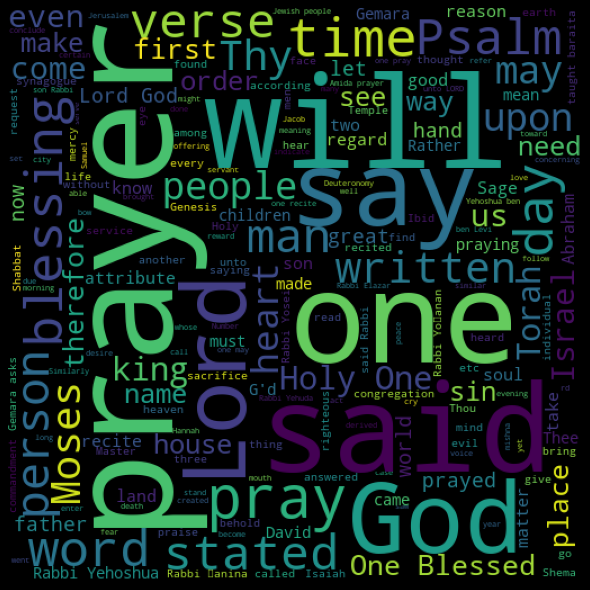

In [370]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

prayer_words = ' '.join(list(all_prayer_df[all_prayer_df['topic'] == 1]['En']))
prayer_wc = WordCloud(width = 512,height = 512).generate(prayer_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(prayer_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

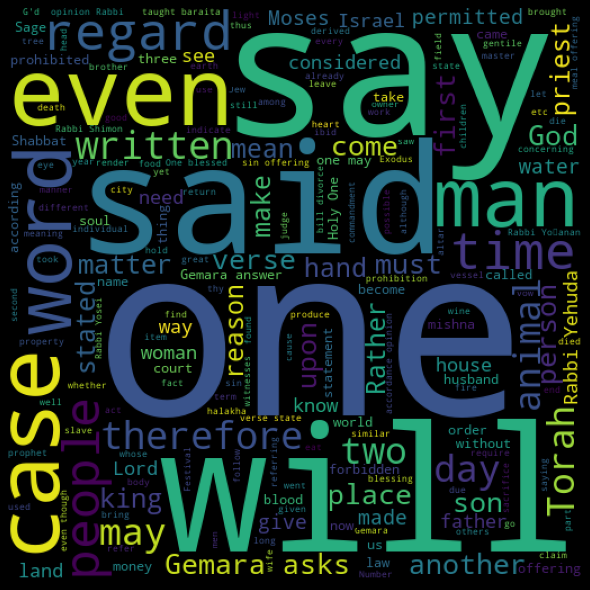

In [371]:
not_prayer_words = ' '.join(list(all_prayer_df[all_prayer_df['topic'] == 0]['En']))
not_prayer_wc = WordCloud(width = 512,height = 512).generate(not_prayer_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(not_prayer_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [377]:
# Convert a collection of text documents to a matrix of token counts

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

# vectorizer = # vectorizer = CountVectorizer(analyzer=process_text)
# vectorizer = CountVectorizer(ngram_range=(2, 4))
# vectorizer = HashingVectorizer(ngram_range=(2, 4),alternate_sign=False)
vectorizer = TfidfVectorizer(ngram_range=(2, 4))

prayer_bag_of_words = vectorizer.fit_transform(all_prayer_df['En'])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(prayer_bag_of_words, all_prayer_df['topic'], test_size=0.20, random_state=0)
# shape of prayer bag of words
prayer_bag_of_words.shape
# Create and train the naive Bayes classifier
# The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification)


from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

classifier = MultinomialNB().fit(X_train, y_train)
# for Gaussian need array format
# X_train = X_train.toarray()
# X_test = X_test.toarray()
# classifier = GaussianNB().fit(X_train, y_train)
# classifier = BernoulliNB().fit(X_train, y_train)


# Evaluate the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("TRAINING")
pred = classifier.predict(X_train)
print(classification_report(y_train, pred))
print('Confusion Matrix:\n',confusion_matrix(y_train, pred))
print('\nAccuracy: ',accuracy_score(y_train, pred))

print("\n\nTESTING")
pred = classifier.predict(X_test)
print(classification_report(y_test, pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, pred))
print('\nAccuracy: ',accuracy_score(y_test, pred))

TRAINING
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5122
           1       0.00      0.00      0.00       434

    accuracy                           0.92      5556
   macro avg       0.46      0.50      0.48      5556
weighted avg       0.85      0.92      0.88      5556

Confusion Matrix:
 [[5122    0]
 [ 434    0]]

Accuracy:  0.921886249100072


TESTING
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1271
           1       0.00      0.00      0.00       119

    accuracy                           0.91      1390
   macro avg       0.46      0.50      0.48      1390
weighted avg       0.84      0.91      0.87      1390

Confusion Matrix:
 [[1271    0]
 [ 119    0]]

Accuracy:  0.9143884892086331


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
